In [1]:

import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from matplotlib import cm


Juan José Gaitán - 201912484 

Juan Daniel Rodriguez - 201921704

# PARCIAL 2

In [2]:

P1 = (1,1)
P2 = (-1,1)
P3 = (-1,-1)
P4 = (1,-1)

P = (0,0.5)


### a)

In [3]:

def Temperatura(x,y,A):
    
    suma = 0 
    n = 2
    
    for i in range(n):
        
        coeficientes = 0
        
        for j in range(n): 
            coeficientes+= A[i][j]*(x**i)*(y**j)
        
        suma += coeficientes
    return suma


### b)

In [4]:

position = np.zeros((4,2)) 

position[0][0], position[0][1] = P1
position[1][0], position[1][1] = P2
position[2][0], position[2][1] = P3
position[3][0], position[3][1] = P4


In [5]:

print(position)


[[ 1.  1.]
 [-1.  1.]
 [-1. -1.]
 [ 1. -1.]]


### c)

In [6]:

Matriz = np.array([ [1,1,1,1], [1,-1,1,-1], [1,-1,-1,1], [1,1,-1,-1] ])

lista = np.array([1,2,0.5,0.3])

solucion = np.linalg.solve(Matriz,lista)

coeficientes = np.array( [ [solucion[0],solucion[2]],[solucion[1],solucion[3]] ] )


In [7]:

print(coeficientes)


[[ 0.95  0.55]
 [-0.3  -0.2 ]]


### d)

In [8]:

print( np.array( [ [Temperatura(1,1,coeficientes)] , [Temperatura(-1,1,coeficientes)] , \
                [Temperatura(-1,-1,coeficientes)] , [Temperatura(1,-1,coeficientes)]]))


[[1. ]
 [2. ]
 [0.5]
 [0.3]]


### e)

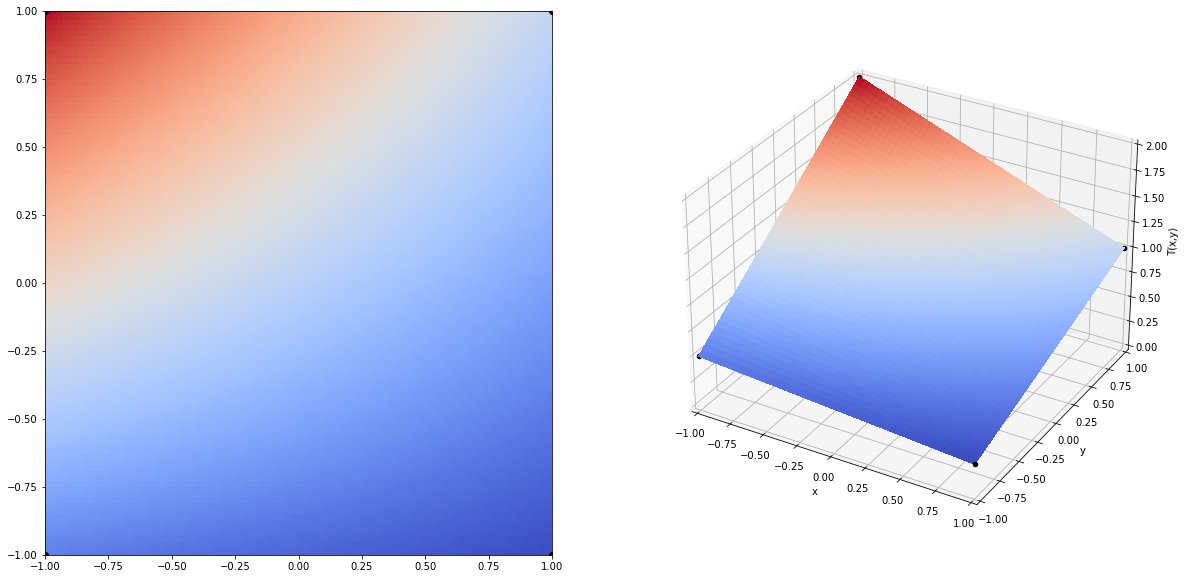

In [9]:

x = np.linspace( -1 , 1 , 100 )
y = np.linspace( -1 , 1 , 100 )
limit = (-1,1)

x, y = np.meshgrid( x , y )

Temperaturas_lista = Temperatura( x , y , coeficientes )

fig_1 = plt.figure( figsize=(20,10) )

ax1 = fig_1.add_subplot( 1 , 2 , 1 )
ax1.pcolor( x , y , Temperaturas_lista , cmap=cm.coolwarm )
ax1.set_ylim( limit )
ax1.set_xlim( limit )

ax1.scatter( P1[0] , P1[1] , color='black' )
ax1.scatter( P2[0] , P2[1] , color='black' )
ax1.scatter( P3[0] , P3[1] , color='black' )
ax1.scatter( P4[0] , P4[1] , color='black' )

ax2 = fig_1.add_subplot( 1 , 2 , 2 , projection='3d')
ax2.set_ylim( limit )
ax2.set_xlim( limit )
ax2.set_zlim( 0 , 2 )

ax2.set_xlabel( 'x' )
ax2.set_ylabel( 'y' )
ax2.set_zlabel( 'T(x,y)' )

ax2.plot_surface( x , y , Temperaturas_lista , cmap=cm.coolwarm , linewidth=0 , antialiased=False )

ax2.scatter( P1[0] , P1[1] , 1 , color='black' )
ax2.scatter( P2[0] , P2[1] , 2 , color='black' )
ax2.scatter( P3[0] , P3[1] , 0.5 , color='black' )
ax2.scatter( P4[0] , P4[1] , 0.3 , color='black' )

plt.show()

### f)

In [10]:

P = (0,0.5)

Temperatura_Punto = Temperatura(P[0],P[1],coeficientes)


In [11]:

print(f'La temperatura en el punto {P}, donde se daño el sensor, es de {Temperatura_Punto} K')


La temperatura en el punto (0, 0.5), donde se daño el sensor, es de 1.225 K


### g)

In [12]:

def Obtener_Puntos_Rotados( puntos , angulo ):
    
    theta_grados = angulo/180*np.pi
    
    matriz_r = np.array( [ [np.cos(theta_grados), -np.sin(theta_grados)],[np.sin(theta_grados),np.cos(theta_grados)] ] )
    
    puntos_r = np.zeros((len(puntos),2))
    
    for i in range(len(puntos)):
        lista_puntos = np.array(puntos[i])
        espacio_puntos = np.dot(matriz_r,lista_puntos)

        puntos_r[i] = espacio_puntos
    
    return puntos_r


### h)

In [13]:

def Obtener_Rotacion( puntos , damage , angulo ):
    
    Puntos_R = Obtener_Puntos_Rotados( puntos , angulo )
    
    Matriz_unos = np.ones( (4,4) )
    
    vectores = len(Matriz_unos)
    for i in range(vectores):
        Matriz_unos[i][1] *= Puntos_R[i][0]
        
    for j in range(vectores):
        Matriz_unos[j][2] *= Puntos_R[j][1]
        
    for k in range(vectores):
        Matriz_unos[k][3] *= Puntos_R[k][0]*Puntos_R[k][1]
    
    
    if (np.linalg.det(Matriz_unos)) == 0:
        return Puntos_R , None
    
    solucion = np.linalg.solve( Matriz_unos, damage )

    Coeficientes_R = np.array( [ [solucion[0],solucion[2]],[solucion[1],solucion[3]] ] )
    
    return Puntos_R, Coeficientes_R


### h)

In [14]:

theta = np.linspace(0,360,10000)

Temporal_rotation = [[],[]]

for i in range(len(theta)):
    RP_,RC_ = Obtener_Rotacion(position,lista,theta[i])
    
    if type(RC_) != type(None):
        temperatura_r = Temperatura(P[0],P[1],RC_)
        Temporal_rotation[0].append(temperatura_r)
        Temporal_rotation[1].append(theta[i])

def Angulo_Radianes(angulo):
    return (angulo*np.pi) / 180


In [15]:
# Verificación angulo en radianes

angulo_rad = Angulo_Radianes( Temporal_rotation[1][np.argmin(Temporal_rotation[0])] )

print(angulo_rad)


2.6423436560346194


In [16]:

print(f'Grados: Para un ángulo de {Temporal_rotation[1][np.argmin(Temporal_rotation[0])]}° la temperatura es de {np.min(Temporal_rotation[0])} K')

print(f'Radianes: Para un ángulo de {angulo_rad} rad la temperatura es de {np.min(Temporal_rotation[0])} K')


Grados: Para un ángulo de 151.3951395139514° la temperatura es de 0.6367508993422235 K
Radianes: Para un ángulo de 2.6423436560346194 rad la temperatura es de 0.6367508993422235 K
